In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [30]:
# Prepare the Data

In [31]:
# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

In [32]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [33]:
# Check tables 
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [34]:
# Check tables 
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [35]:
# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [36]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts()

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse = list(duplicate_rows["Mouse ID"].unique())
print(f"{duplicate_mouse}") 

['g989']


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[(combined_df["Mouse ID"] != "g989")]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [39]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

In [40]:
# Generate Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_drug = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_drug = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_drug = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_dev_drug = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_drug = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

C:\Users\rebec\AppData\Local\Temp\ipykernel_28128\938769272.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_drug = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
C:\Users\rebec\AppData\Local\Temp\ipykernel_28128\938769272.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_drug = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
C:\Users\rebec\AppData\Local\Temp\ipykernel_28128\938769272.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeri

In [42]:
# Assemble the resulting series into a single summary DataFrame.
summary_drug_df = clean_df[["Drug Regimen"]]
summary_drug_df = summary_drug_df.drop_duplicates()
summary_drug_df = summary_drug_df.sort_values("Drug Regimen")
summary_drug_df = summary_drug_df.set_index("Drug Regimen")

summary_drug_df["Mean Tumor Volume"] = mean_drug
summary_drug_df["Median Tumor Volume"] = median_drug
summary_drug_df["Tumor Volume Variance"] = variance_drug
summary_drug_df["Tumor Volume Std. Dev."] = std_dev_drug
summary_drug_df["Tumor Volume Std. Err."] = sem_drug
summary_drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
# Create Bar Charts and Pie Charts

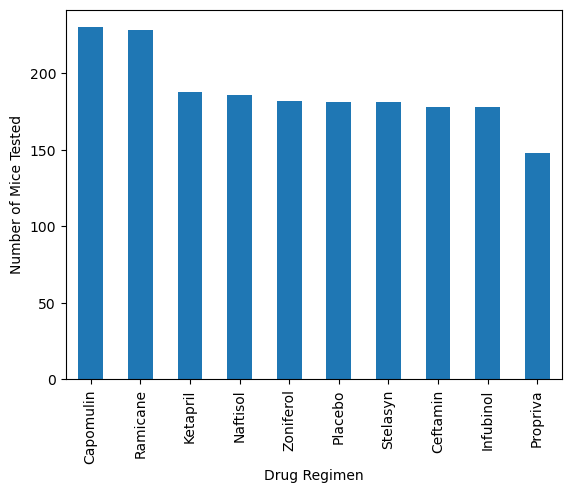

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using Pandas.
timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count()
timepoints = timepoints.sort_values(ascending=False)

timepoints.plot(kind="bar")
plt.ylabel("Number of Mice Tested")
plt.show()

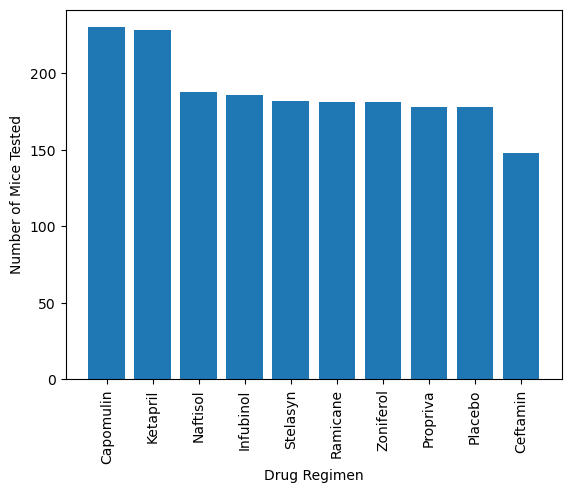

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using pyplot.
drug = clean_df["Drug Regimen"].unique()
x_axis = np.arange(len(drug))
timepoints = clean_df.groupby("Drug Regimen")["Timepoint"].count()
timepoints = timepoints.sort_values(ascending=False)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug, rotation="vertical")

plt.bar(x_axis, timepoints, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

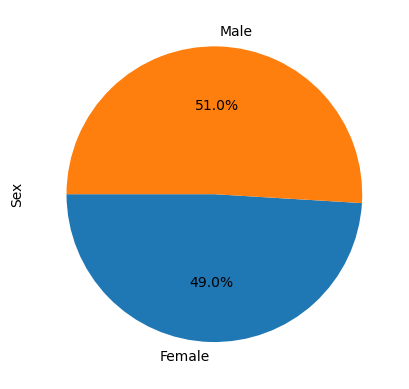

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_count = clean_df.groupby("Sex")["Mouse ID"].count()

mice_count.plot(kind= "pie", autopct="%1.1f%%",  startangle=180)
plt.ylabel("Sex")
plt.show()

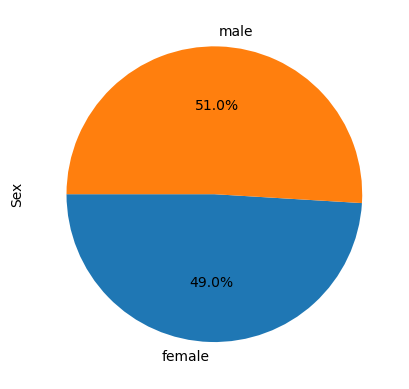

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_count = clean_df.groupby("Sex")["Mouse ID"].count()
labels = ["female", "male"]

plt.pie(mice_count, autopct="%1.1f%%", startangle=180, labels=labels)
plt.ylabel("Sex")
plt.show()

In [48]:
# Calculate Quartiles, Find Outliers, and Create a Box Plot

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, last_timepoint, on=["Mouse ID", "Timepoint"])
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumour_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    volume = merged_df.loc[(merged_df["Drug Regimen"]) == treatment]["Tumor Volume (mm3)"]

    # add subset 
    tumour_vol.append(volume)

# Determine outliers using upper and lower bounds
for x in range(len(treatments)):
    quartiles = tumour_vol[x].quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumour_vol[x].loc[(tumour_vol[x] < lower_bound) | (tumour_vol[x] > upper_bound)]

    print(f"{treatments[x]}'s potential outliers: {outliers.tolist()}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


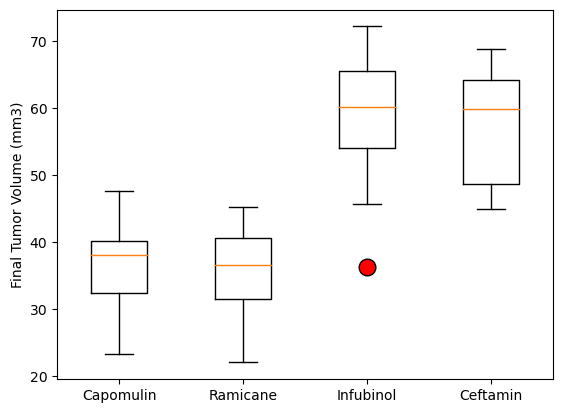

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumour_vol, labels=treatments, flierprops={"markerfacecolor": "red", "markersize": 12})
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

In [52]:
# Create a Line Plot and a Scatter Plot

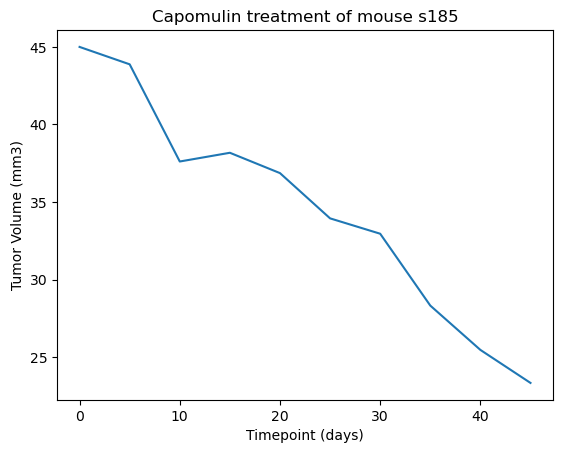

In [63]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]

mouse = capomulin_mice_df["Mouse ID"].sample().values[0]
mouse_df = capomulin_mice_df.loc[(capomulin_mice_df["Mouse ID"] == mouse)]

fig2, ax2 = plt.subplots()
ax2.set_title(f"Capomulin treatment of mouse {mouse}")
ax2.set_xlabel("Timepoint (days)")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
plt.show()

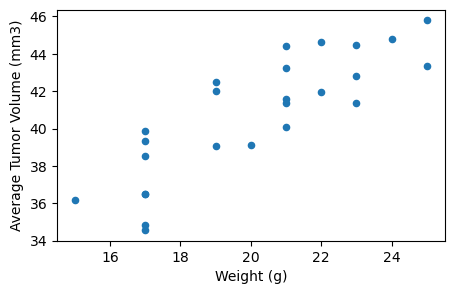

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor = capomulin_mice_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avg_tumor_df = pd.merge(avg_tumor, capomulin_mice_df[["Mouse ID", "Weight (g)"]].drop_duplicates(), on="Mouse ID")
avg_tumor_df = avg_tumor_df.reset_index(drop=True)

avg_tumor_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", figsize=(5,3))
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [ ]:
# Calculate Correlation and Regression

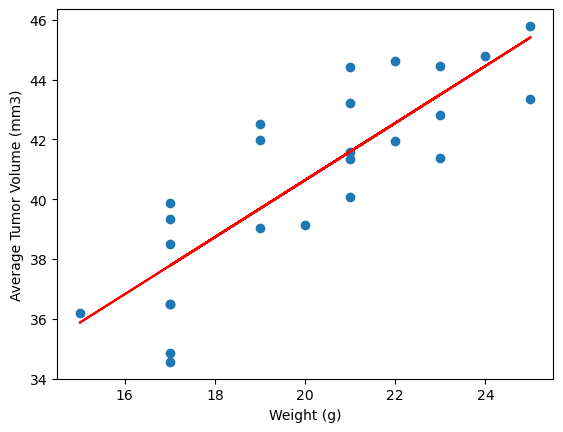

The correlation between mouse weight and the average tumor volume is 0.84


In [74]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_tumor_df["Weight (g)"]
y_values = avg_tumor_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round((rvalue),2)}")